# Линейная регрессия

## Постановка задачи

Представим, что мы хотим определить цену в одном доме квартиры на основании площади квартиры. У нас есть база данных полученная от риэлтерской компании. В данном случае нам нужно найти зависимость между площадью квартиры и ценой квартиры. То есть, нужно найти функцию $f(X) = y$, где $X$ это площадь квартиры, а $y$ это цена на квартиру. Это и есть задача регрессии.

Давайте загрузим и визуализируем данные. Для этого нажмите *Ctrl+Enter* на следующей ячейке. После этого в вектре $X$ у нас будет площадь квартиры в $м^2$, а в вектре $y$ цена на квартиру. А внизу ячейки у нас будет диаграмму с точками.

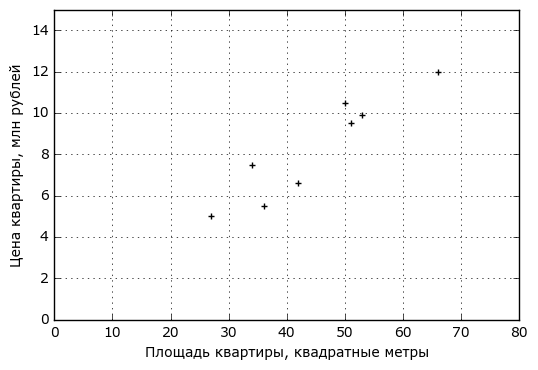

   Площадь квартиры  Цена квартиры
0                27      5000000.0
1                34      7500000.0
2                36      5500000.0
3                42      6600000.0
4                50     10500000.0
5                51      9500000.0
6                53      9900000.0
7                66     12000000.0


In [1]:
from regression_helper import * # не обращайте внимание на эту строчку
X, y = get_data()    # Загружаем данные в X и y
plot_data(X, y)      # Строим диаграму с точками 
print_table_with_data(X, y)

Допустим мы предполагаем, что данная зависимость может описаться линейной функцией вида $y = kX$. Это наша гипотеза. Давайте нанесем на график несколько линейных функциях с разным коэффициентом.

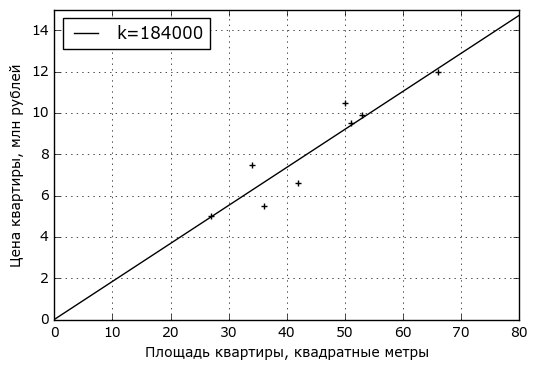

In [2]:
choose_slope(X, y)

## Функция ошибки

У нас есть гипотезы. Но как численно определить какая из них лучшая?

Для это введем функцию ошибку, также известную как функцию потерь. Функция ошибки - численное значение того, как наша гипотеза хорошо моделирует функцию.

Пусть у нас есть функция (наша модель)  $f(X) = kX = \hat{y}$. То есть, $\hat{y}$ является предсказанными нами значениями для X. А настоящие значения будут равны $y$.

Тогда определим нашу функцию ошибки от параметра k:

$J(k) = \frac{1}{2N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2} = \frac{1}{2N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это количество квартир, $X_i$ - это площадь i-oй квартиры, $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.
      
Например, $X_2=36$, $y_3=5500000.0$

$\sum_{i=0}^{N}$  - это знак суммирования.
Например, у нас есть $a_0, a_2, a_3, \cdots a_N$. Тогда $\sum_{i=0}^{N}{a_i} = a_0 + a_2 + a_3 + \cdots + a_N$

Ниже у нас есть пример с визуализацией ошибки для одной из гипотез.


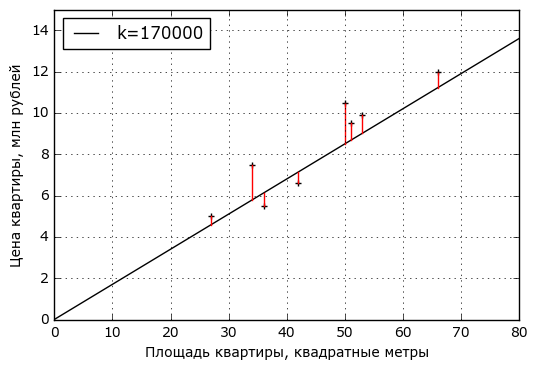

In [3]:
plot_data_and_error(X, y)

Давайте визуализируем ошибки для наших гипотез.

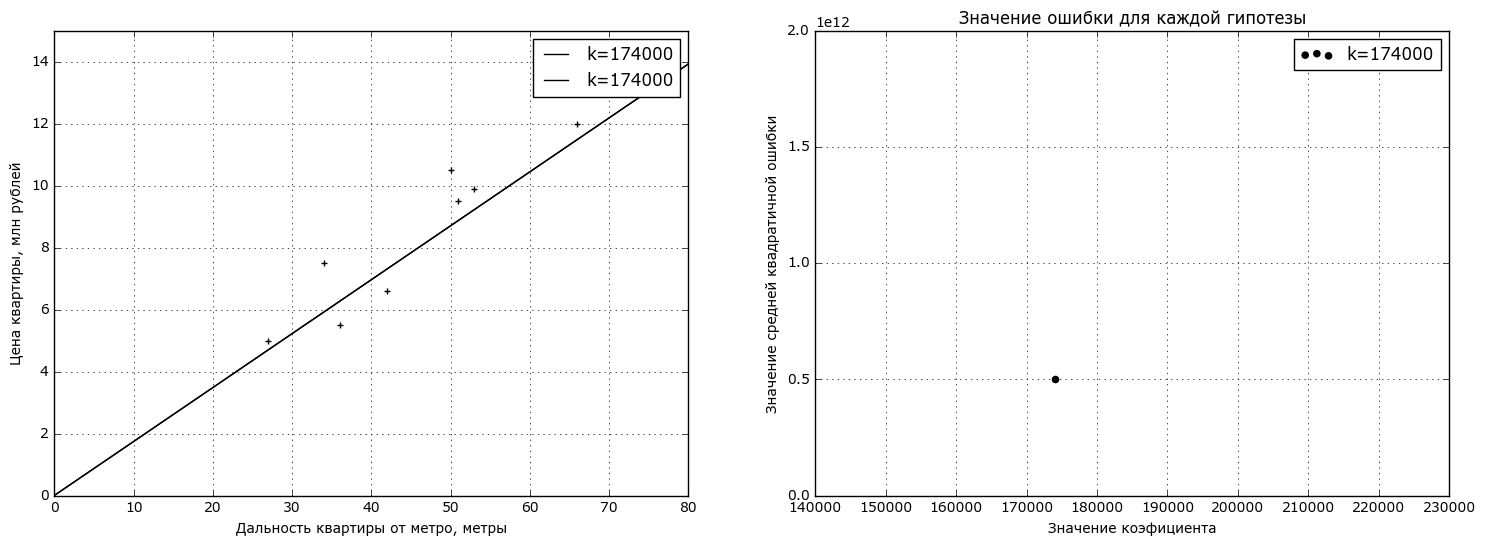

In [4]:
plot_data_and_J(X, y) 

Давайте теперь визуализируем всю функцию ошибки.

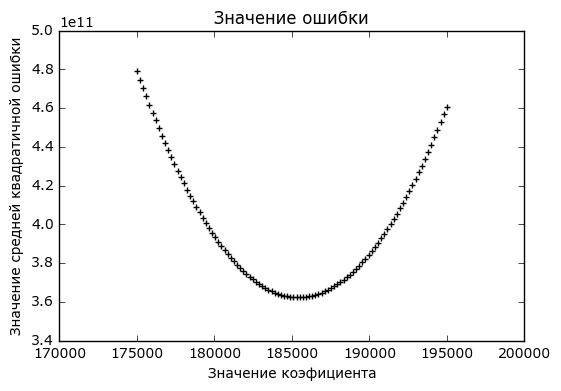

In [5]:
plot_all_J(X, y) 

## Производная

Наша задачи - это минимизации функции ошибки. 
Я думаю, что вы знаете как можно найти значение минимума для данной функции. Нужно взять производную функции ошибки и приравнять ее к нулю. $J'(k) = \frac{dJ(k)}{dk} = 0$.

В данном случае производную можно рассматривать $f'(x_0) = \frac{f(x_0+\epsilon) - f(x_0)}{\epsilon}, \epsilon \rightarrow 0$ 

![alt](img\der.jpg) 

Например, для функции $f(x) = x^2$, $f'(x) = \frac{(x+\epsilon)^2 - x^2}{\epsilon} = \frac{x^2+ 2x\epsilon + \epsilon^2 - x^2}{\epsilon}= \frac{2x\epsilon + \epsilon^2}{\epsilon} = 2x + \epsilon = 2x$

$\epsilon \rightarrow 0$

Таким образом, в нашем случае:

$ J'(k) = \frac{dJ(k)}{dk} = \frac{d}{dk}(\frac{1}{2N}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}) 
= 2 \cdot \frac{1}{2N}\sum_{i=1}^{N} (kX_i - y_i)\frac{d}{dk}(kX_i - y_i) =
          \frac{1}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 
          
И для нахождения минимума нужно приравнять производную к нулю. $ \frac{dJ(k)}{dk} = 0$

Решив уравнение, мы получим значение для $k=185072.4$


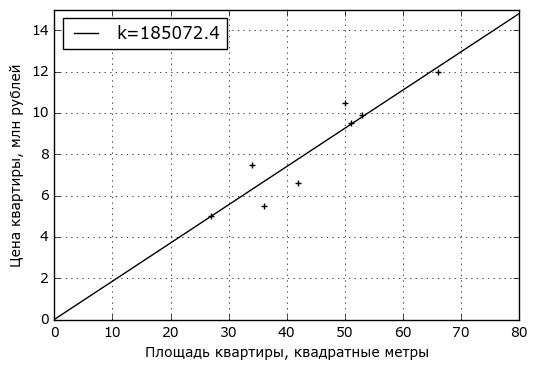

In [6]:
plot_data_and_hyp(X, y, 185072.4) 

Но в реальных приложениях не всегда возможно решить это уравнение (далее я расскажу поподробнее о таких ситуациях). Поэтому, познакомимся с такой техникой как градиентный спуск. Как вызнаете, значение производной в точке равно значению тангенса угла наклона касательной в данной точке.

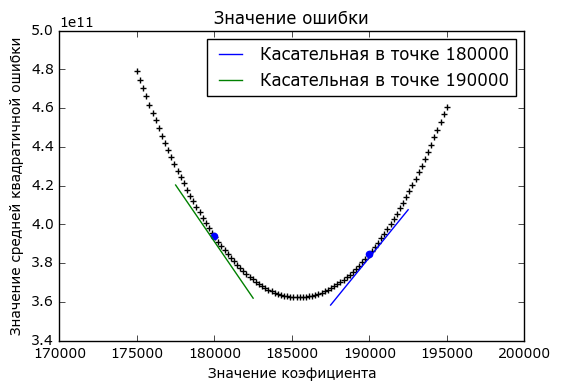

In [7]:
plot_all_J_with_der(X, y) 

## Градиентный спуск

Использую эту информацию мы можем понять где находится минимум и изменить значение $k$ в сторону минимума. Если производная положительная (как касательная в точке 190000), то нам нужно уменьшать значение $k$. Если производная отрицательная (как касательная в точке 180000), то нам нужно увеличить значение $k$.  

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $k$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \frac{d}{dk} J(k)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$

Где $\alpha$ это коэффициент, который мы выбреем. Теперь поэкспериментируем со значением $\alpha$ и начальным значением коэффициента.

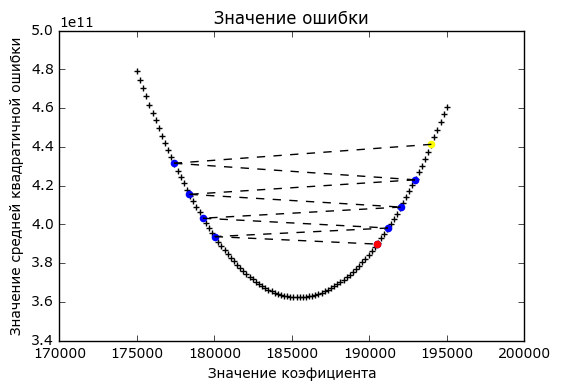

In [8]:
Traice(X, y)

# Цена квартиры в зависимости от площади и дальности квплощадьартиры от центра Москвы
Допустим теперь нам требуется определить цену квартиры в зависимости от квартиры и дальности квартиры от центра Москвы. То есть, теперь у нас есть 2 параметра. И наша функция, которую мы хотим найти будет выглядеть вот так $y = F(X^{площадь}, X^{дальность})$, где $X^{площадь}$ площадь квартиры в $м^2$, $X^{дальность}$ дальность квартиры от центра в км, а $y$ цена на квартиру.

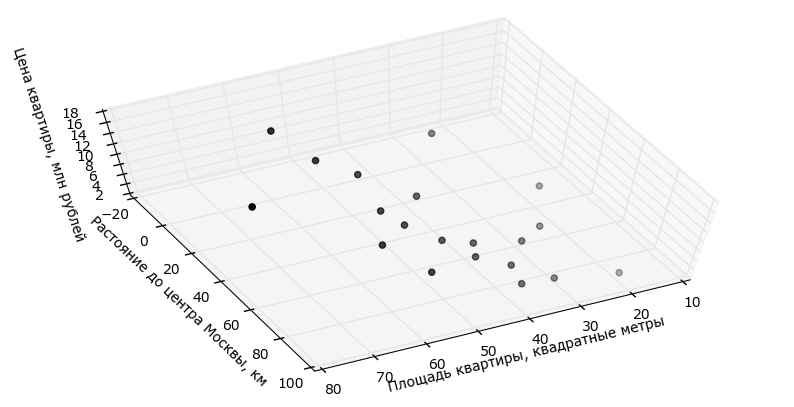

In [9]:
X_square, X_distance, y = get_new_data()
print_3d_table_with_data(X_square, X_distance, y)
plot_new_3d_data(X_square, X_distance, y)

Для решения данной проблемы введем нашу гипотезу: $f(X^{площадь}, X^{дальность}) = k_0 + k_1 X^{площадь} + k_2 X^{дальность} = \hat{y}$. Это линейная функция для двух входных параметров.

Тогда определим нашу функцию ошибки от параметров $k_0, k_1, k_2$:

$J(k) = \frac{1}{2N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=1}^{N}{(k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)^2}$

Где $N$ - это количество квартир, $X^{площадь}_i$ - это площадь i-oй квартиры, $X^{дальность}_i$ - это расстояние квартиры до центра Москвы, а $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого коэффициента.

$\frac{\delta  J(k_0, k_1, k_2)}{\delta k_0} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_1} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)X^{площадь}_i$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_2} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i - y_i)X^{дальность}_i$ 

Мы также можем приравнять каждую производную к нулю и найти решение системы уравнений. Но делать это не целесообразно. Для решения данной системы в компьютере потребуется построить матричное уравнение. А в процессе решения потребуется найти обратную матрицу. Данная операция является очень медленной, даже на современных компьютерах. В данном примере у нас всего 2 входных параметра и 20 значений $X$. Вычисления обратной матрицы для нашего примера займет микросекунды. Но в реальных приложениях обычно бывает и по десяткам тысяч входных параметров и сотни миллионов значений. Нахождения обратной матриц для таких задач займет несравнимо много времени по сравнению с градиентным спуском. Поэтому в промышленности применяется именно градиентный спуск. 

Полный алгоритм градиентного спуска c $M$ коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $k_0, k_1, ... k_M$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{0_{new}} = k_0 - \alpha \cdot \frac{\delta }{\delta k_0} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{1_{new}} = k_1 - \alpha \cdot \frac{\delta }{\delta k_1} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \cdots $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{M_{new}} = k_M - \alpha \cdot \frac{\delta }{\delta k_M} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_0 = k_{0_{new}}, k_1 = k_{1_{new}} \cdots k_M = k_{M_{new}}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

Давайте теперь визуализируем ошибку.


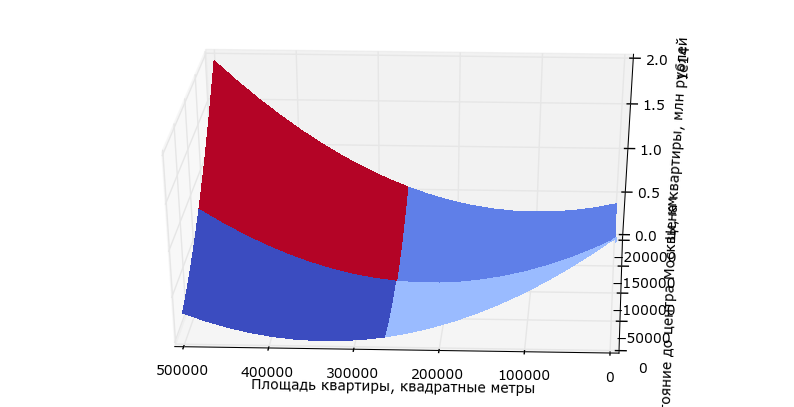

In [10]:
plot_loss_in_3d(X_square, X_distance, y)

Тогда если мы используем формулы выше, то мы увидим следующую картину.

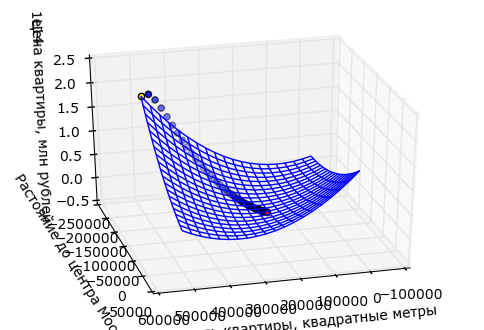

In [11]:
a=0.0001
k1, k2 = lin_grad_full(X_square, X_distance, y, alpha=a, iters=50, k0_init=5000000, k1_init=500000, k2_init=-200000)

А теперь визуализируеим полученный результат.

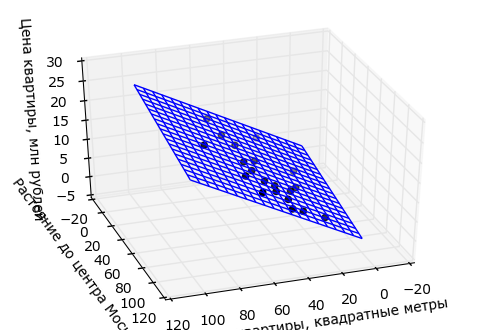

In [12]:
plot_new_data_and_hyp(X_square, X_distance, y, 5000000, k1, k2)

# Переобучение и слишком простая модель

Как вы понимаете линейные функции не всегда могут быть использована для все данных. Например, допустим у нас есть следующий набор данных:

![alt](img\new_data.png)

Линейная регрессия может предсказать только прямую линию, но тут такое не пойдет. Нам нужно что-то по сложнее. То есть, наша модель слишком простая.

## Полиномы

Полиномом степени n называется функция $poly(X) = k_n X^n + k_{n-1} X^{n-1}  \ldots + k_1 X + k_0$. Известное вам квадратное уравнение — это полином второй степени. $quadratic(X) = k_2 X^2 + k_1 X + k_0$, или как вы привыкли его видеть: $quadratic(X) = a X^2 + b X + c$.

![alt](img\polynomes.png)

В дальнейшем мы будем использовать полиномиальную регрессию. Ее можно простым образом получить из линейной регрессии. 
Как вы уже догадались формула линейной регрессии от M параметров можно записать следующим образом:
$ f(X^{\textrm{(1-ый параметр)}}, 
    X^{\textrm{(2-ой параметр)}}, 
    \cdots, 
    X^{\textrm{(M-1-ый параметр)}}, 
    X^{\textrm{(M-ый параметр)}}) 
    = 
    k_0 + 
    k_1 X^{\textrm{(1-ый параметр)}} + 
    k_2 X^{\textrm{(2-ой параметр)}} + 
    \cdots + 
    k_{M - 1} X^{\textrm{(M-1-ый параметр)}} + 
    k_M X^{\textrm{(M-ый параметр)}}$.

Но заменив $X^{\textrm{(i-ый параметр)}}$ на $X^{i}$. Мы получим формулу для полинома от $X$. Напоминаю, что $X^{i}$ значит значение $X$ в степени i. То есть, мы передаем в формулу линейной регрессии $X^i$, вместо i-го параметра.

$ f(X, 
    X^2, 
    \cdots, 
    X^{M-1}, 
    X^M) = k_0 + k_1 X + k_2 X^2 + \cdots + k_{M - 1} X^{M - 1} + k_M X^{M} = poly(X)$.


Давайте получим и визуализируем новые данные.

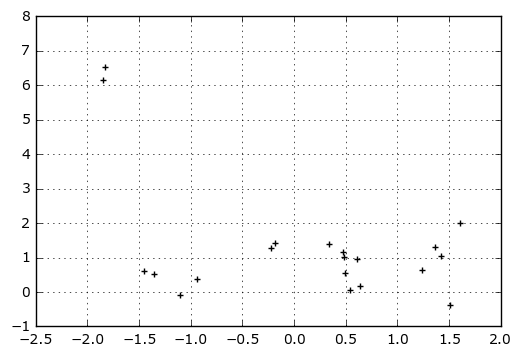

In [13]:
X, y = get_poly_data()
plot_more_poly_data(X, y)

Теперь посмотрим, как различные полиномы могут репрезентировать данные.

Ошибка равна = 0.0


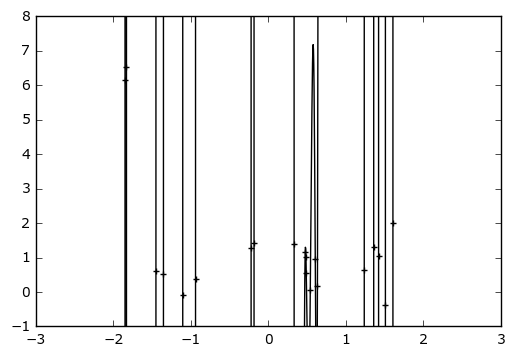

In [15]:
plot_poly_data(X, y)

Но нужно помнить, что не всегда у нас может быть хороший набор данных. Допустим после того как мы обучили нашу модель мы собрали еще данных.  

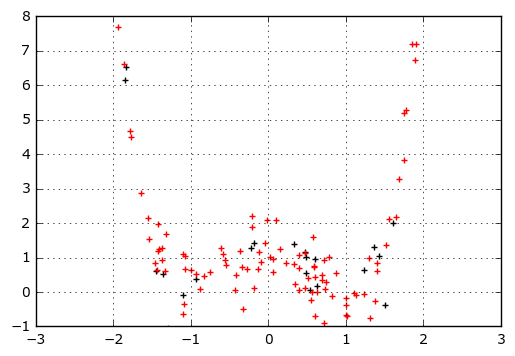

In [14]:
X1, y1 = get_more_poly_data()
plot_more_poly_data(X, y, X1, y1)

Теперь посмотрим на ошибку также на новых данных.

Ошибка на новых данных = 4.9674
Ошибка равна = 0.1106


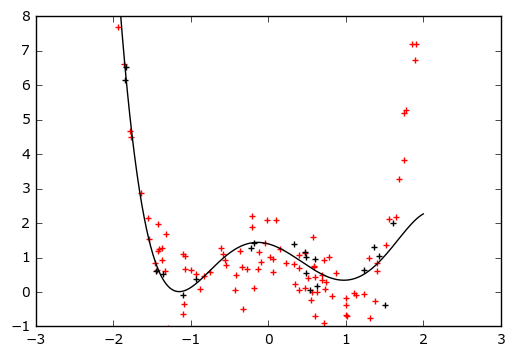

In [16]:
plot_poly_data(X, y, X1, y1)

То есть, слишком сложная модель переобучается на данных. 

Для решения этой проблемы мы делим наши данные на обучающий набор и тестовый набор. Модель обучается на тестовом наборе, но окончательная оценка производится по тестовому набору. 

## Пример переобучения человека


![alt](img\illusion.jpg)

![alt](img\illusion2.jpg)

# Задание

1. Сделать линейную функцию
2. Сделать функцию ошибки
3. Рассчитать градиент
4. Реализовать градиентный спуск

Задания следует делать одно за другим.

Для начала запустим следующую ячейку, которая визуализирует наши данные.

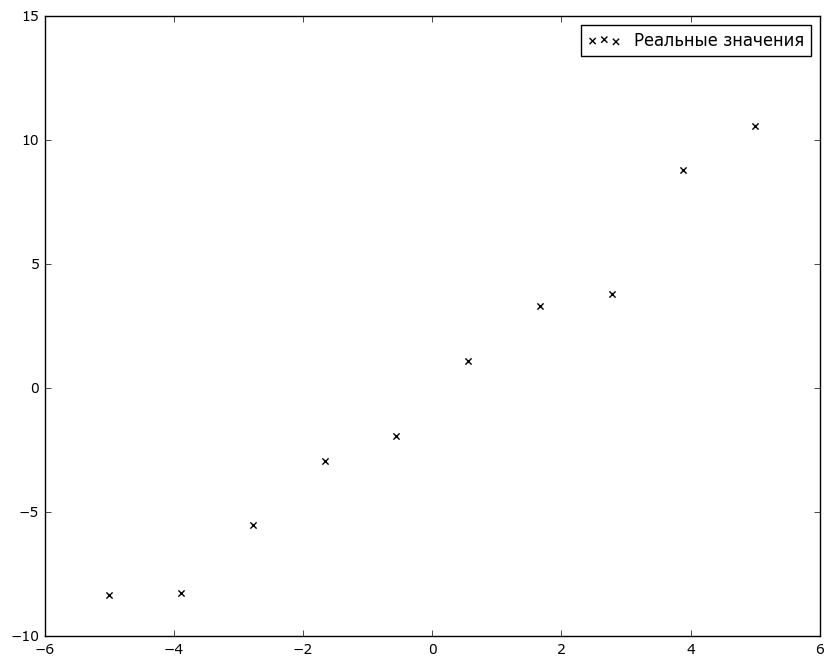

In [17]:
import numpy as np # подгружаем дополнительную библиотеку
from regression_task import *

plot_data()

##### Реализовать линейную функцию вида $y = kx$. 
   На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1. Функция должна  возвращать вектор-столбец $\mathbf{y}$ размера Nx1. 
   То есть, вектор столбец y можно записать как:
   
   \begin{equation*}
    \mathbf{y} = \begin{pmatrix}
    y_0 \\
    y_1 \\
    \cdots \\
    y_N \\
    \end{pmatrix} = 
    \begin{pmatrix}
    k x_1 \\
    k x_2 \\
    \cdots \\
    k x_N \\
    \end{pmatrix}
    \end{equation*}

Все шикарно, молодец!


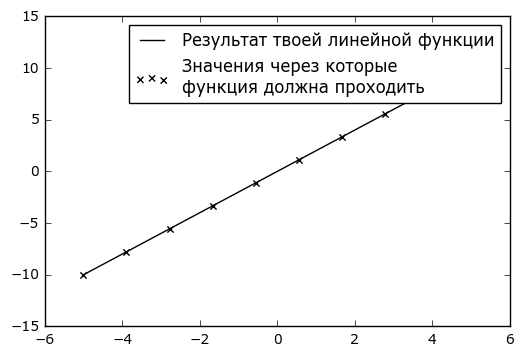

In [18]:
def linear_function(k, X):
    # Напоминаю, что код нужно писать в области между звездочками. 
    # Вы можете решить данную задачу с помощью цикла, но 
    # постарайтесь решить ее с помощью векторизации.

    y = np.zeros_like(X) # создаем переменную y и заполняем ее нулями
    N = X.shape[0]       # получаем размер вектора столбца

    #***********************************************************************
    y = k * X
   
    
    #***********************************************************************

    return y
 
check_linear_function(linear_function)


##### Реализовать функцию потерь $J(k) = \frac{1}{2N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать действительное число равное $J(k)$.


In [20]:
def loss_function(k, X, y):
    # Ты можешь использовать функцию linear_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один вектор из другого, а также помни что,
    # ты можешь почленно вводить в степень вектор. 
    
    # Результат функции потерь должен быть записан в переменную J
   
    
    N = X.shape[0]       # получаем размер вектора столбца
    
    J = 0

    #***********************************************************************
    J = sum((k*X - y)**2)/(2*N)

    #***********************************************************************

    return J
   
check_loss_function(loss_function)


Все шикарно, молодец!
Реальное значение ошибки: 0.417
Твое значение ошибки: 0.417


##### Реализовать градиент(произвоодную) $J'(k) = \frac{dJ(k)}{dk} = \frac{1}{N} \sum_{i=1}^{N} (f(X_i) - y_i) X_i  = \frac{1}{N} \sum_{i=1}^{N} (kX_i - y_i) X_i$ 
          
          
На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать градиент равный $J'(k)$.


In [28]:
def gradient_function(k, X, y):
    # Ты можешь использовать функцию linear_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один из другого, а также помни что,
    # ты можешь почленно перемножать вектора вектор. 
    
    # Результат функции потерь должен быть записан в переменную grad
        
    N = X.shape[0]       # получаем размер вектора столбца
    
    grad = 0

    #***********************************************************************

    grad = sum((k * X - y) * X) / (len(X))
                       
    #***********************************************************************

    return grad
   
check_gradient_function(gradient_function)

Все шикарно, молодец!
Реальное значение градиента: -9.6965
Твое значение градиента: -9.6965


##### Финишная прямая. Пора реализовать алгоритм градиентного спуска. 
На вход функции передается начальное значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c реальными значениями размера Nx1, значение коэффициента альфа $\alpha$ и число $iters$ равное количеству итераций в алгоритме. 
Сам алгоритм мы будем использовать в следующем виде
* Повторить $iters$ раз:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k - \alpha \cdot J'(k)$


Все шикарно, молодец!
Реальное значение коэффициента: 1.8489
Твое значение коэффициента: 1.8489


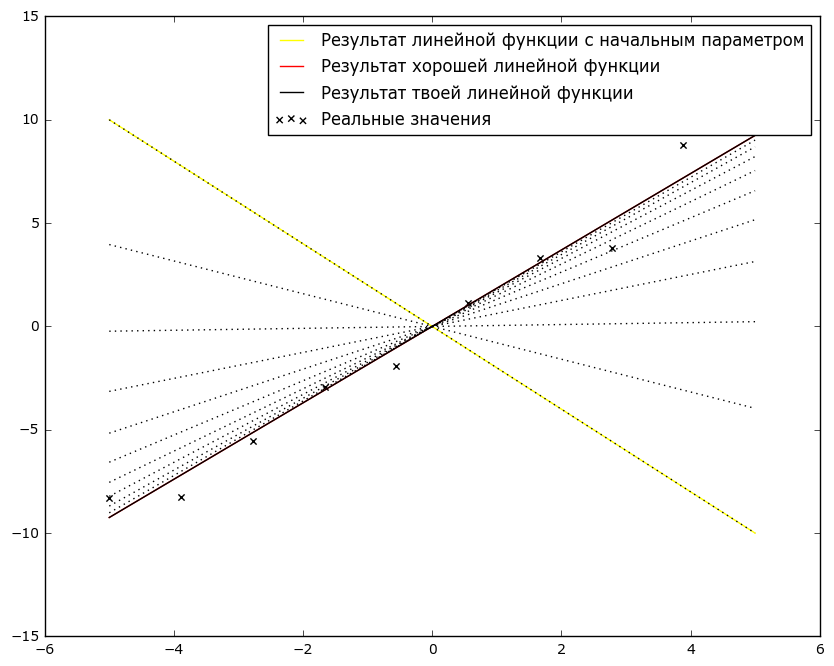

In [35]:
def gradient_descent(k_init, X, y, alpha, iters):
    # Лучше всего использовать функцию gradient_function для 
    # нахождения градиента, чем пересчитывать его еще раз
    
    # И еше я прошу перед тем как изменить значение k в массиве 
    # k_old.
    # Например, i это счетчик цикла.
    # Тогда значение k можно сохранить как k_old[i] = k
        
    k = k_init
    k_old = np.array([0.0]*iters)


    #***********************************************************************

    for i in range (0, iters):
        k_old[i] = k
        k = k - (alpha * gradient_function(k, X, y))
        

    #***********************************************************************

    return k, k_old
    
check_gradient_descent(gradient_descent)
